In [1]:
import kagglehub
path = kagglehub.dataset_download("sshikamaru/fruit-recognition")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sshikamaru/fruit-recognition/versions/2


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

In [3]:
train_dir = "//root//.cache//kagglehub//datasets//sshikamaru//fruit-recognition//versions//2//train//train"
test_dir = '//root//.cache//kagglehub//datasets//sshikamaru//fruit-recognition//versions//2//test//test'

IMG_HEIGHT, IMG_WIDTH = 100, 100
batch_size = 256
EPOCHS = 50
num_classes = 33

In [4]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2
)

# Train and Validation Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


In [5]:
model = Sequential([
    Conv2D(128, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation="tanh",kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(128, activation="tanh",kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation="softmax"),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 98, 98, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 49, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 47, 47, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 33)                  │           4,257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,840,225 (33.72 MB)

 Trainable params: 8,839,713 (33.72 MB)

 Non-trainable params: 512 (2.00 KB)

In [9]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [early_stopping,  reduce_lr]

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    class_weight=class_weights
)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2365 - loss: 5.4681 - val_accuracy: 0.0292 - val_loss: 6.7414 - learning_rate: 5.0000e-04
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3261 - loss: 3.9753 - val_accuracy: 0.0259 - val_loss: 6.7796 - learning_rate: 5.0000e-04
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4209 - loss: 3.1494 - val_accuracy: 0.0375 - val_loss: 6.5375 - learning_rate: 5.0000e-04
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5139 - loss: 2.6905 - val_accuracy: 0.0321 - val_loss: 7.4212 - learning_rate: 5.0000e-04
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5482 - loss: 2.4122 - val_accuracy: 0.0289 - val_loss: 7.5548 - learning_rate: 5.0000e-04
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6188 - loss: 2.1284 - val_accuracy: 0.0259 - val_loss: 7.0449 - learning_rate: 5.0000e-04
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6823 - loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 970ms/step - accuracy: 0.9947 - loss: 0.3112
Validation Accuracy: 99.46%


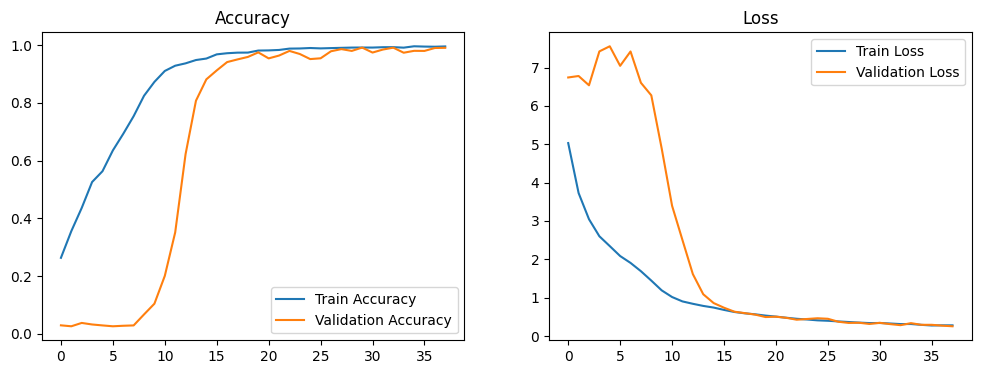

In [10]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = ['0021.jpg','0030.jpg','0052.jpg','0095.jpg']
for i in range(len(img_path)):
  img = image.load_img(img_path[i], target_size=(IMG_HEIGHT, IMG_WIDTH))
  img_array = image.img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)

  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  class_labels = list(train_generator.class_indices.keys())
  print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
Predicted Class: Tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Class: Corn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: Cantaloupe
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: Grape Blue
